# Build datasets for Reservoir Computing

## Exchange metabolites list

In [1]:
# Run cobra on various models

DIRECTORY = './Dataset_input/'

from Library.Import import *
from Library.Build_Dataset import get_objective
import cobra

MEDIA, EXCHANGE = {}, {}
species = [ 
    'e_coli_core', #0
    'iEK1008', 
    'iIT341', #2
    'iJN1463', 
    'iML1515', #4
    'iMM904',
    'iPC815', #6
    'iYO844',
    'iYS1720', 
    'iYS854', # 9
    'iCN718',
    'iNF517',
    'iML1515EXP'
]
for i in [ 12 ]:
    name = species[i]
    cobrafile = f'{DIRECTORY}{name}_duplicated.xml'
    model = cobra.io.read_sbml_model(cobrafile)
    for r in model.medium.keys():
        if r in MEDIA.keys():
            MEDIA[r] = MEDIA[r] + ',' + name
        else:
            MEDIA[r] = name
    nEXCHANGE = 0
    for reaction in model.reactions:
        r = reaction.id
        if '_e' not in r:
            continue
        nEXCHANGE += 1
        if r in EXCHANGE.keys():
            EXCHANGE[r] = EXCHANGE[r] + ',' + name
        else:
            EXCHANGE[r] = name
    
    objective = get_objective(model)
    solution = model.optimize()
    print(f'{name} Nbr reactions: {len(model.medium.keys())} Nbr {solution.fluxes[objective]}')

    print(f'{name} Medium-size: {len(model.medium.keys())} Exchange reactions: {nEXCHANGE} Objective: {objective} {solution.fluxes[objective]}')

for r in MEDIA.keys():
    print(f'Medium {r} {MEDIA[r]}')
for r in EXCHANGE.keys():
    print(f'Exchange {r} {EXCHANGE[r]}')



iML1515EXP Nbr reactions: 331 Nbr 0.8769972144270597
iML1515EXP Medium-size: 331 Exchange reactions: 662 Objective: BIOMASS_Ec_iML1515_core_75p37M 0.8769972144270597
Medium EX_pi_e_i iML1515EXP
Medium EX_co2_e_i iML1515EXP
Medium EX_met__L_e_i iML1515EXP
Medium EX_metsox_S__L_e_i iML1515EXP
Medium EX_acgam_e_i iML1515EXP
Medium EX_cellb_e_i iML1515EXP
Medium EX_crn_e_i iML1515EXP
Medium EX_hxan_e_i iML1515EXP
Medium EX_ile__L_e_i iML1515EXP
Medium EX_chol_e_i iML1515EXP
Medium EX_fe3_e_i iML1515EXP
Medium EX_lac__L_e_i iML1515EXP
Medium EX_leu__L_e_i iML1515EXP
Medium EX_glcn_e_i iML1515EXP
Medium EX_no3_e_i iML1515EXP
Medium EX_h_e_i iML1515EXP
Medium EX_orn_e_i iML1515EXP
Medium EX_gln__L_e_i iML1515EXP
Medium EX_pro__L_e_i iML1515EXP
Medium EX_glyc_e_i iML1515EXP
Medium EX_man_e_i iML1515EXP
Medium EX_ade_e_i iML1515EXP
Medium EX_mn2_e_i iML1515EXP
Medium EX_4abut_e_i iML1515EXP
Medium EX_ac_e_i iML1515EXP
Medium EX_akg_e_i iML1515EXP
Medium EX_ala__L_e_i iML1515EXP
Medium EX_arg__L

In [2]:
# Get media
# Minimal medium is composed of metabolites both in the initial strain and duplicated strain
# Variable medium is composed of metabolites in duplicated strain NOT in initial strain

DIRECTORY = './Dataset_input/'

from Library.Import import *
from Library.Build_Dataset import get_objective
import cobra

MEDIA, EXCHANGE = {}, {}
species = [ 
    'e_coli_core', #0
    'iEK1008', 
    'iIT341', #2
    'iJN1463', 
    'iML1515', #4
    'iMM904',
    'iPC815', #6
    'iYO844',
    'iYS1720', 
    'iYS854', # 9
    'iCN718',
    'iNF517',
    'iML1515EXP'
]
for i in [ 11 ]:
    name = species[i]
    cobrafile = f'{DIRECTORY}{name}.xml'  # name of the model 
    model = cobra.io.read_sbml_model(cobrafile)
    for r in model.medium.keys():
        print(name, r)
for i in [ 11 ]:
    name = species[i]
    cobrafile = f'{DIRECTORY}{name}_duplicated.xml'  # name of the model 
    model = cobra.io.read_sbml_model(cobrafile)
    for r in model.medium.keys():
        print(name, r, model.medium[r])
    solution = model.optimize()    
    print(solution.objective_value)

iNF517 EX_4abz_e
iNF517 EX_ade_e
iNF517 EX_ala__L_e
iNF517 EX_arg__L_e
iNF517 EX_asp__L_e
iNF517 EX_co2_e
iNF517 EX_cys__L_e
iNF517 EX_fe2_e
iNF517 EX_fe3_e
iNF517 EX_glc__D_e
iNF517 EX_glu__L_e
iNF517 EX_gly_e
iNF517 EX_gua_e
iNF517 EX_h2o_e
iNF517 EX_h_e
iNF517 EX_his__L_e
iNF517 EX_ile__L_e
iNF517 EX_ins_e
iNF517 EX_leu__L_e
iNF517 EX_lys__L_e
iNF517 EX_met__L_e
iNF517 EX_mn2_e
iNF517 EX_nac_e
iNF517 EX_nh4_e
iNF517 EX_orot_e
iNF517 EX_phe__L_e
iNF517 EX_pi_e
iNF517 EX_pnto__R_e
iNF517 EX_ribflv_e
iNF517 EX_ser__L_e
iNF517 EX_thm_e
iNF517 EX_thr__L_e
iNF517 EX_thymd_e
iNF517 EX_ura_e
iNF517 EX_val__L_e
iNF517 EX_xan_e
iNF517 EX_zn2_e
iNF517 EX_2aeppn_e_i 1e-300
iNF517 EX_2h3mb_e_i 1e-300
iNF517 EX_2h3mp_e_i 1e-300
iNF517 EX_2hxic__L_e_i 1e-300
iNF517 EX_2mba_e_i 1e-300
iNF517 EX_2mbald_e_i 1e-300
iNF517 EX_2mpa_e_i 1e-300
iNF517 EX_3mba_e_i 1e-300
iNF517 EX_3mbal_e_i 1e-300
iNF517 EX_4abut_e_i 1e-300
iNF517 EX_4abz_e_i 0.00999
iNF517 EX_acald_e_i 1e-300
iNF517 EX_acgala_e_i 1e-300
i

## Generating training sets

### From experimental data set

In [3]:
# Generate training set with experimental dataset

from Library.Import import *
from Library.Build_Dataset import TrainingSet, get_index_from_id
DIRECTORY = './Dataset_input/Covid/'

# What you can change
seed = 10
np.random.seed(seed=seed)  # seed for random number generator
cobraname = 'Covid_duplicated'  # name of the model
mediumname = 'Covid_GR'  # name of the medium file
method = 'EXP'  # FBA, pFBA or EXP
reduce = False  # Set at True if you want to reduce the model
# End of What you can change

# Get parameters from medium file
cobrafile = f'{DIRECTORY}{cobraname}'
mediumfile = f'{DIRECTORY}{mediumname}'
parameter = TrainingSet(cobraname=cobrafile,
                        mediumname=mediumfile,
                        method=method,
                        verbose=False)

trainingfile = f'{DIRECTORY}{mediumname}'
parameter.save(trainingfile, reduce=reduce)

# Verifying
parameter = TrainingSet()
parameter.load(trainingfile)
print(trainingfile)
parameter.printout()

./Dataset_input/Covid/Covid_GR
model file name: ./Dataset_input/Covid/Covid_GR
reduced model (min flux): False
medium file name: ./Dataset_input/Covid/Covid_GR
medium: 92
experimental medium: 0
list of reactions in objective: ['BIOMASS_Ec_iML1515_core_75p37M']
method: EXP
trainingsize: 112
list of measured reactions: 3682
Stoichiometric matrix: (1877, 3682)
Boundary matrix from reactions to medium: (56, 3682)
KO matrix from reactions to ko: (12, 3682)
Measurement matrix from reaction to measures: (3682, 3682)
Training set X: (112, 68)
Training set Y: (112, 1)


### From FBA simulated data

In [ ]:
# Create a FBA simulated training for various species

from Library.Import import *
from Library.Build_Dataset import TrainingSet, get_objective, get_minmed_varmed_ko
import matplotlib.pyplot as plt
import cobra

DIRECTORY = './Dataset_input/'

from Library.Utilities import *
from Library.Build_Dataset import TrainingSet

seed = 10
np.random.seed(seed=seed)  
size = 10000
ratmed =  28 # max nbr of variable media turned on biolog 127 Paul 28

species = [ 
    'e_coli_core', #0
    'iEK1008', 
    'iIT341', #2
    'iJN1463', 
    'iML1515', #4
    'iMM904',
    'iPC815', #6
    'iYO844',
    'iYS1720', 
    'iYS854', # 9
    'iCN718',
    'iNF517',
    'iML1515EXP'
]

for i in [ 11 ]:
    name = species[i]    
    method = 'EXP' if 'EXP' in name else 'FBA'
    # Get data
    cobrafile = f'{DIRECTORY}{name}_duplicated'
    mediumfile  = f'{DIRECTORY}{name}'
    parameter = TrainingSet(cobraname=cobrafile, 
                            mediumname=mediumfile, 
                            method=method,
                            ratmed=ratmed,
                            verbose=True)

    # Build training set
    if method == 'FBA':
        parameter.X = np.asarray([]).reshape(0, 0)
        parameter.Y = np.asarray([]).reshape(0, 0)
        parameter.size = 0
        minmed, varmed, ko = get_minmed_varmed_ko(parameter.medium)
        parameter.get(sample_size=size, verbose=False)

    # Saving file
    trainingfile = f'{DIRECTORY}{name}_train'
    parameter.save(trainingfile, reduce=False)

    # Verifying
    parameter = TrainingSet()
    parameter.load(trainingfile)
    parameter.printout()


# Cluster and entropy plots

e_coli_core
File: e_coli_core_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 6
Shannon entropy: 2.2667


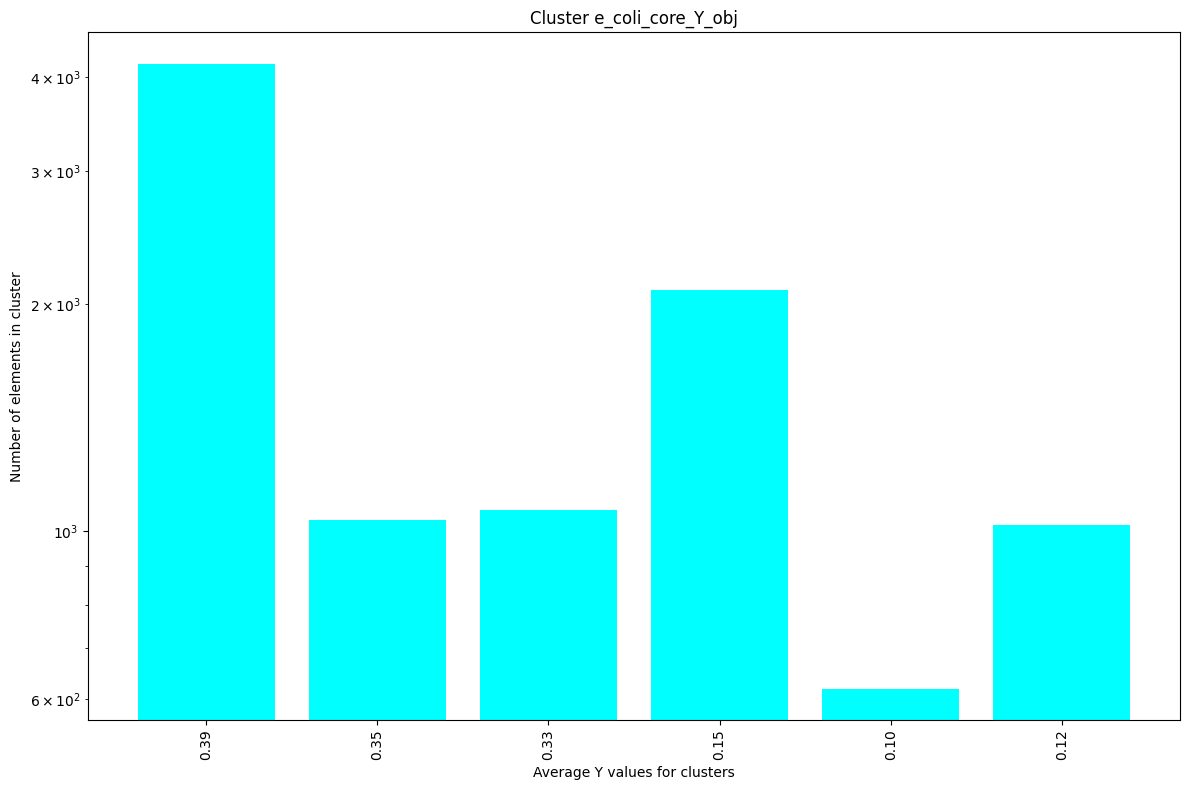

File: e_coli_core_Y_all size: (10000, 154)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 22
Shannon entropy: 2.5289


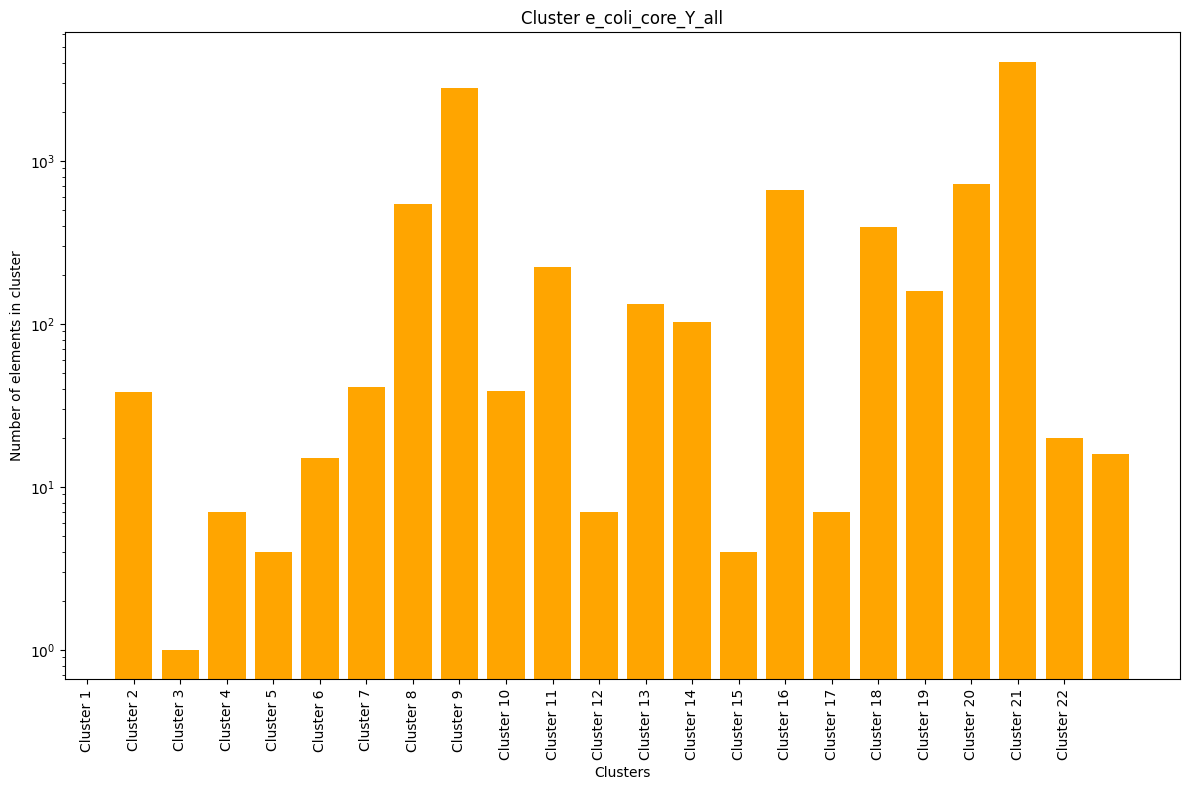

iEK1008
File: iEK1008_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 31
Shannon entropy: 4.6555


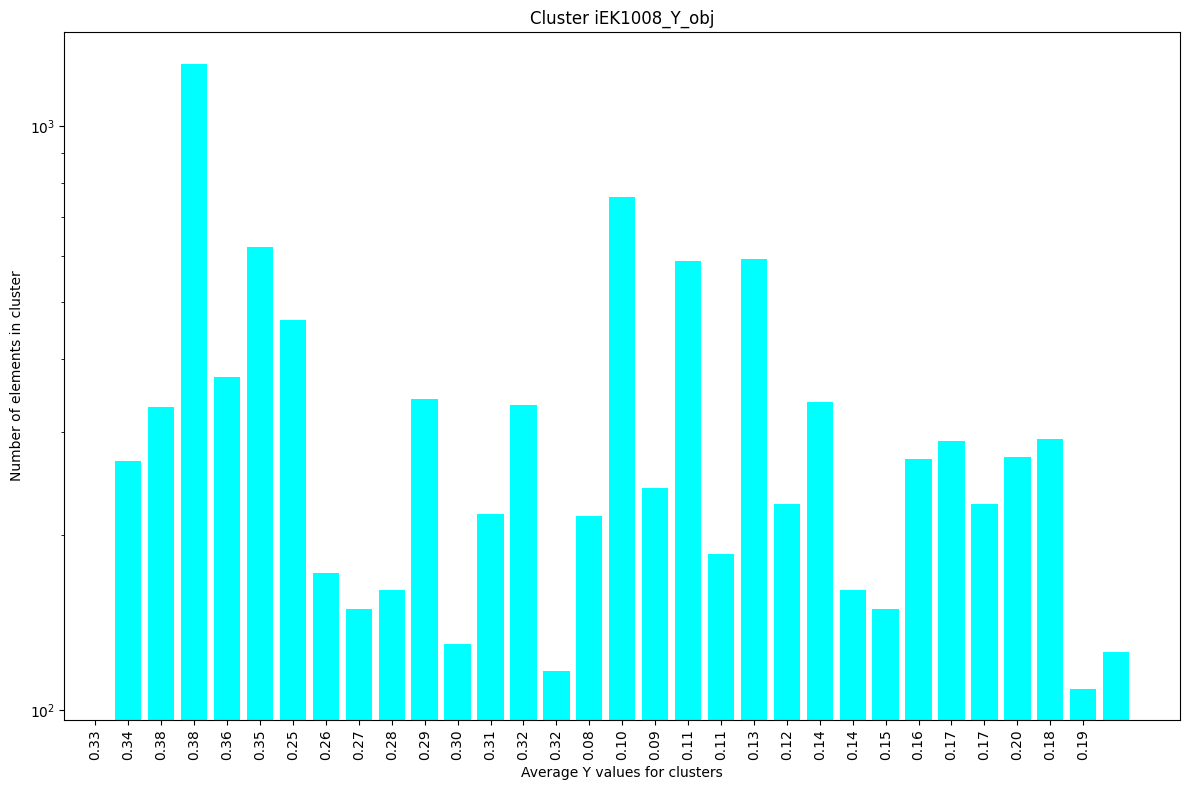

File: iEK1008_Y_all size: (10000, 1597)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 97
Shannon entropy: 6.2414


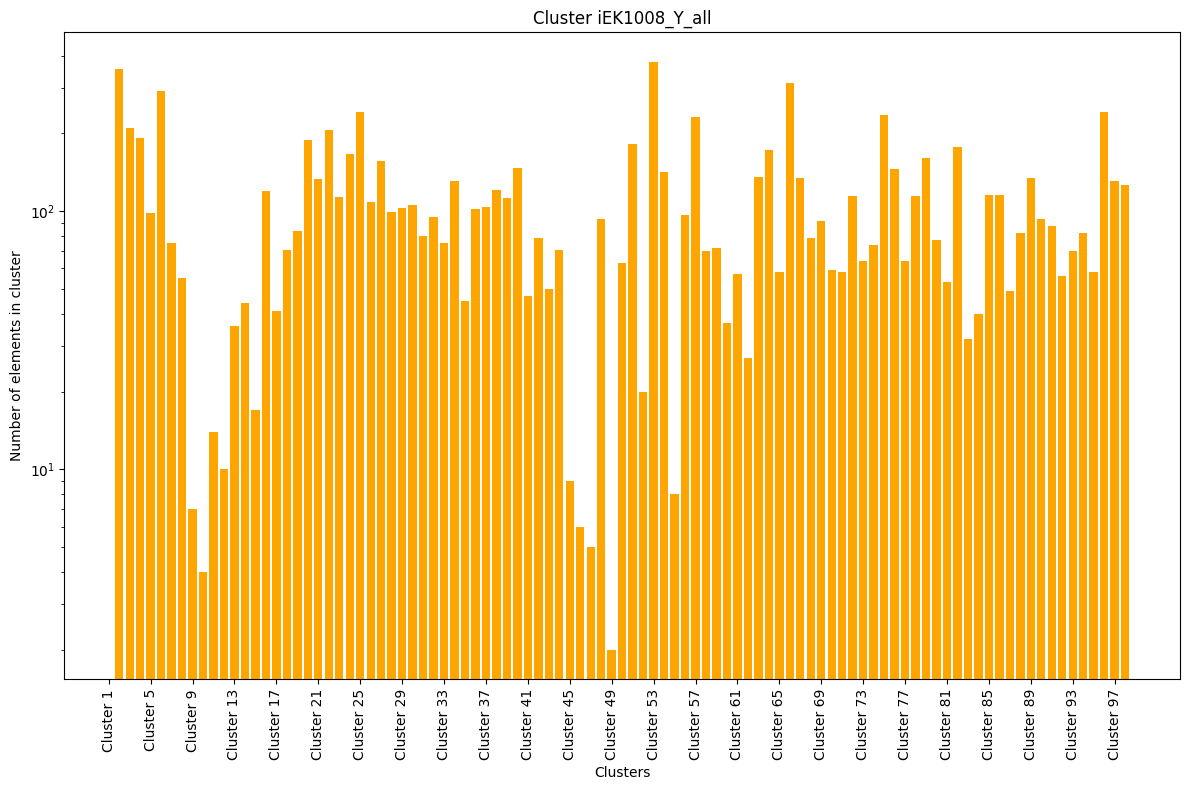

iIT341
File: iIT341_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 46
Shannon entropy: 3.1886


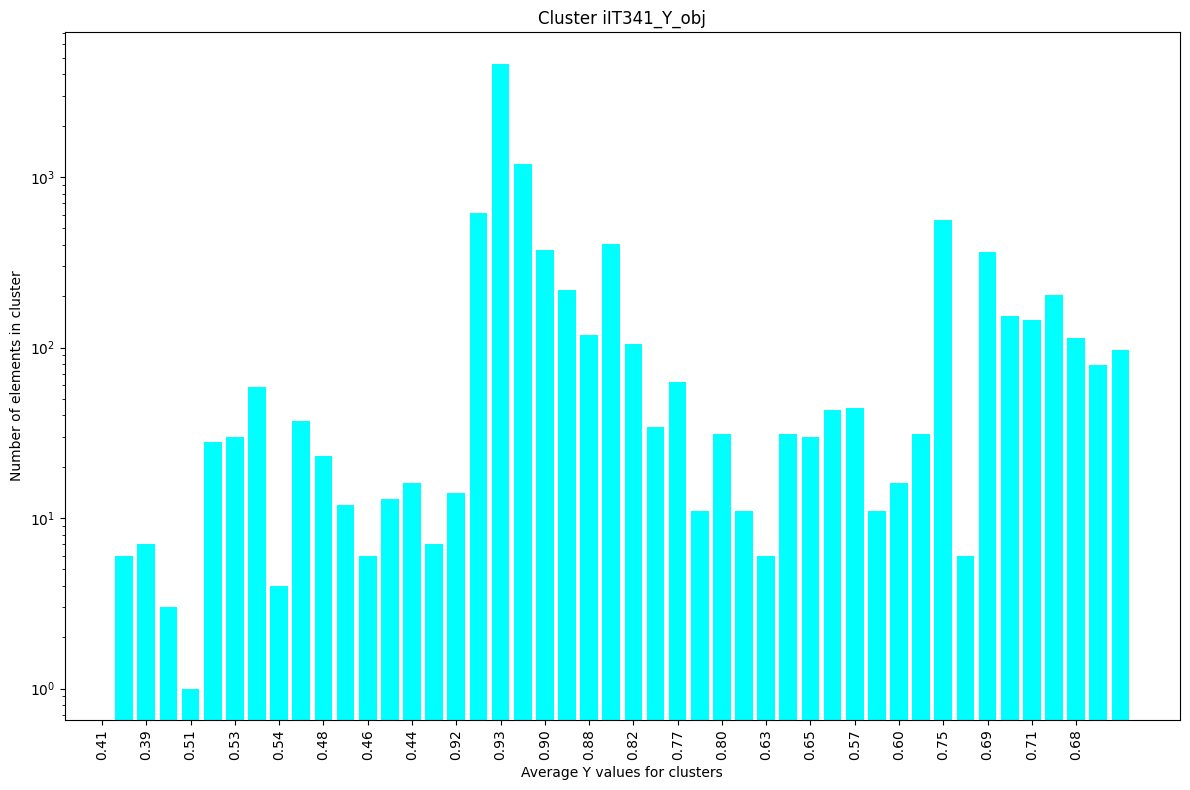

File: iIT341_Y_all size: (10000, 793)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 84
Shannon entropy: 4.5615


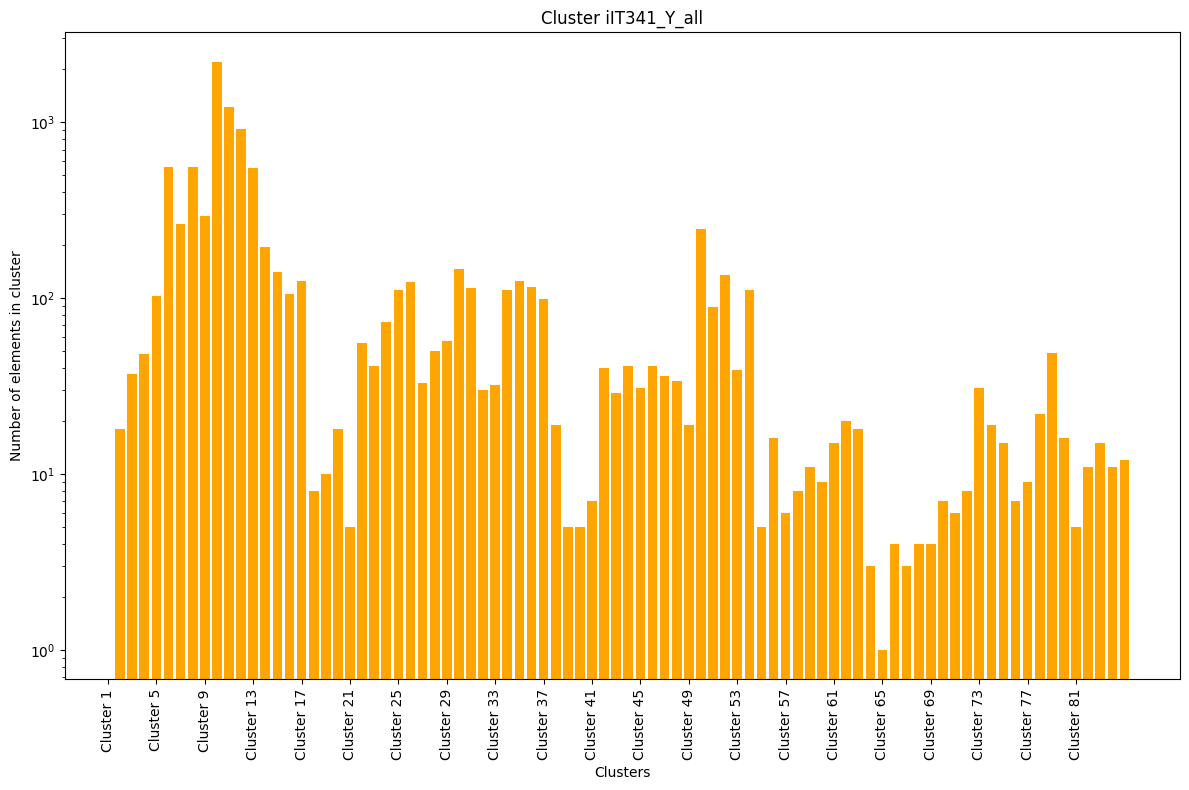

iJN1463
File: iJN1463_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 51
Shannon entropy: 4.8964


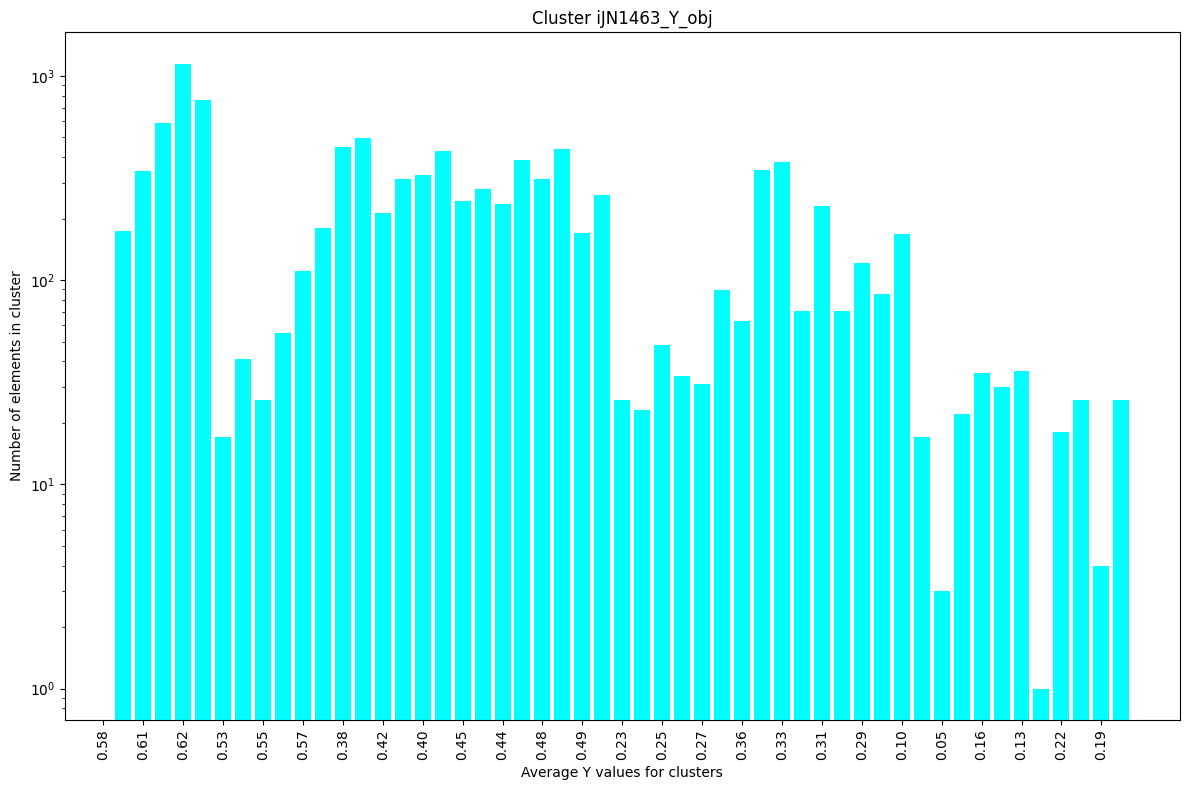

File: iJN1463_Y_all size: (10000, 4034)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 77
Shannon entropy: 5.7807


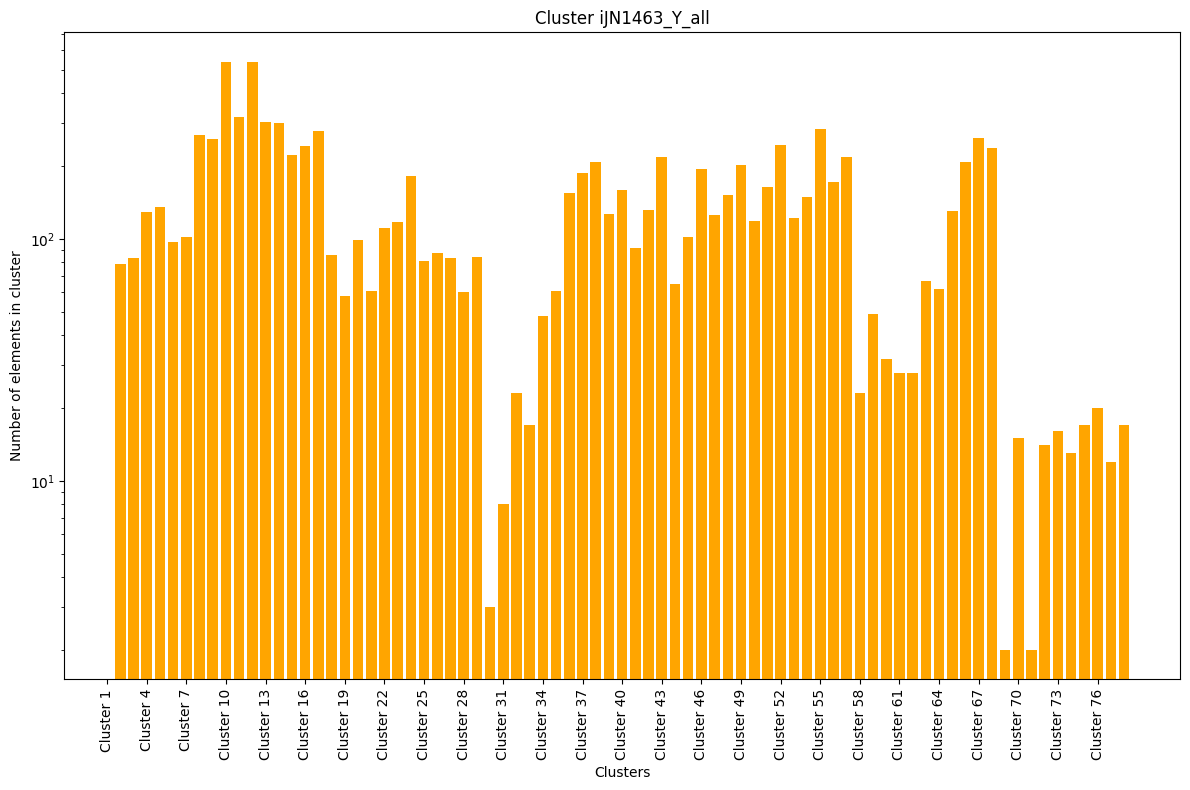

iML1515
File: iML1515_Y_obj size: (500, 1)
Threshold (Precision): 0.01
Number of clusters: 66
Shannon entropy: 5.8037


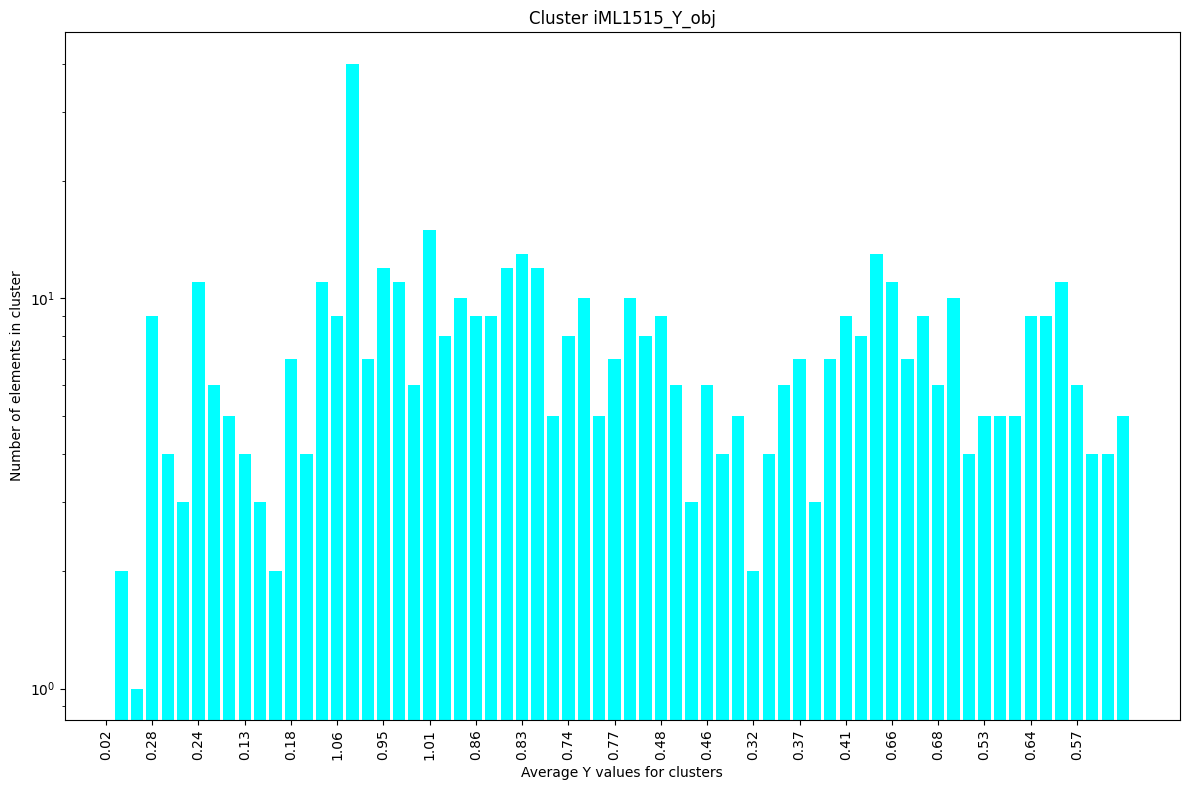

File: iML1515_Y_all size: (500, 3682)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 121
Shannon entropy: 6.7005


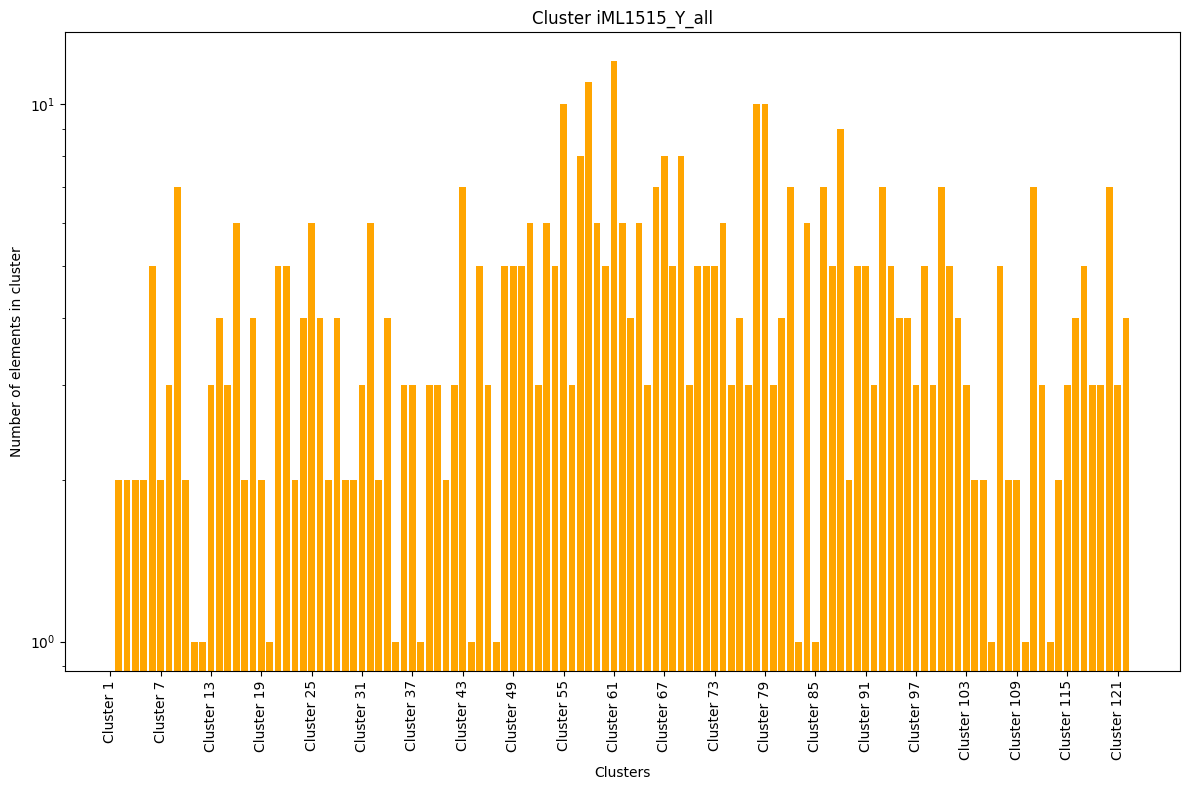

iMM904
File: iMM904_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 58
Shannon entropy: 5.5657


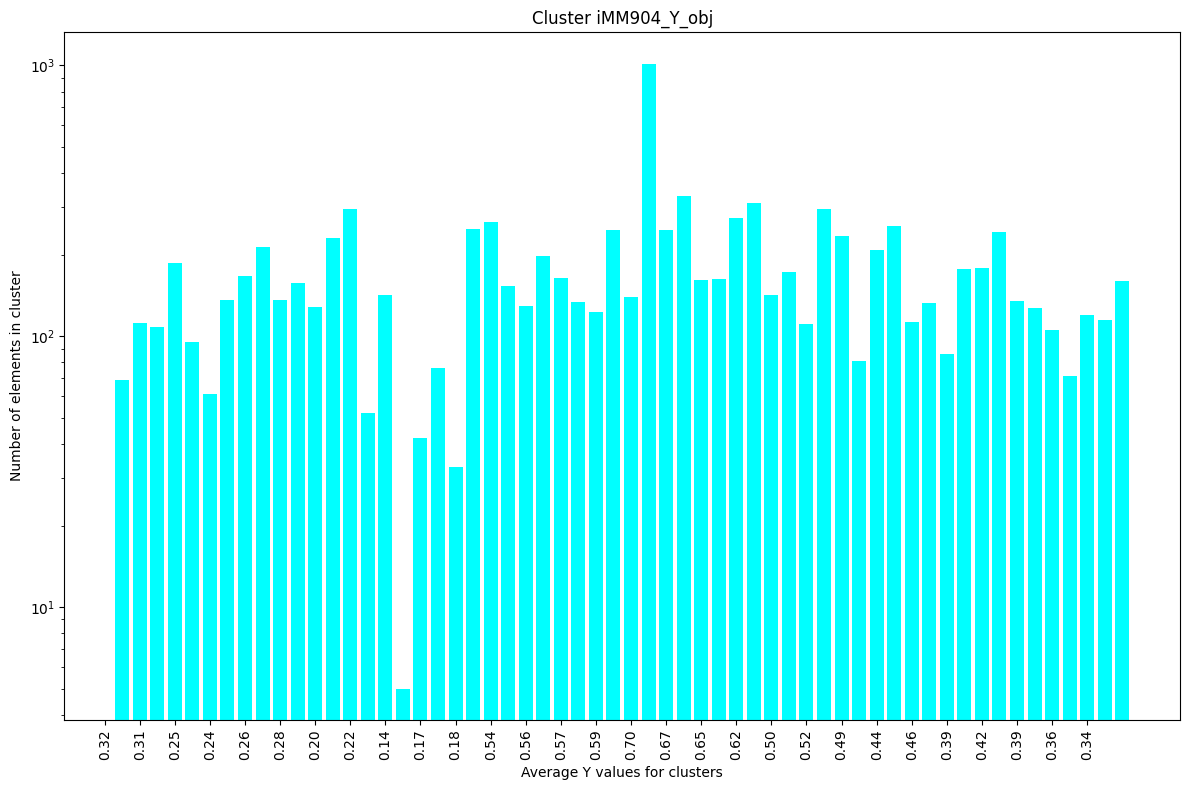

File: iMM904_Y_all size: (10000, 2226)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 149
Shannon entropy: 7.0320


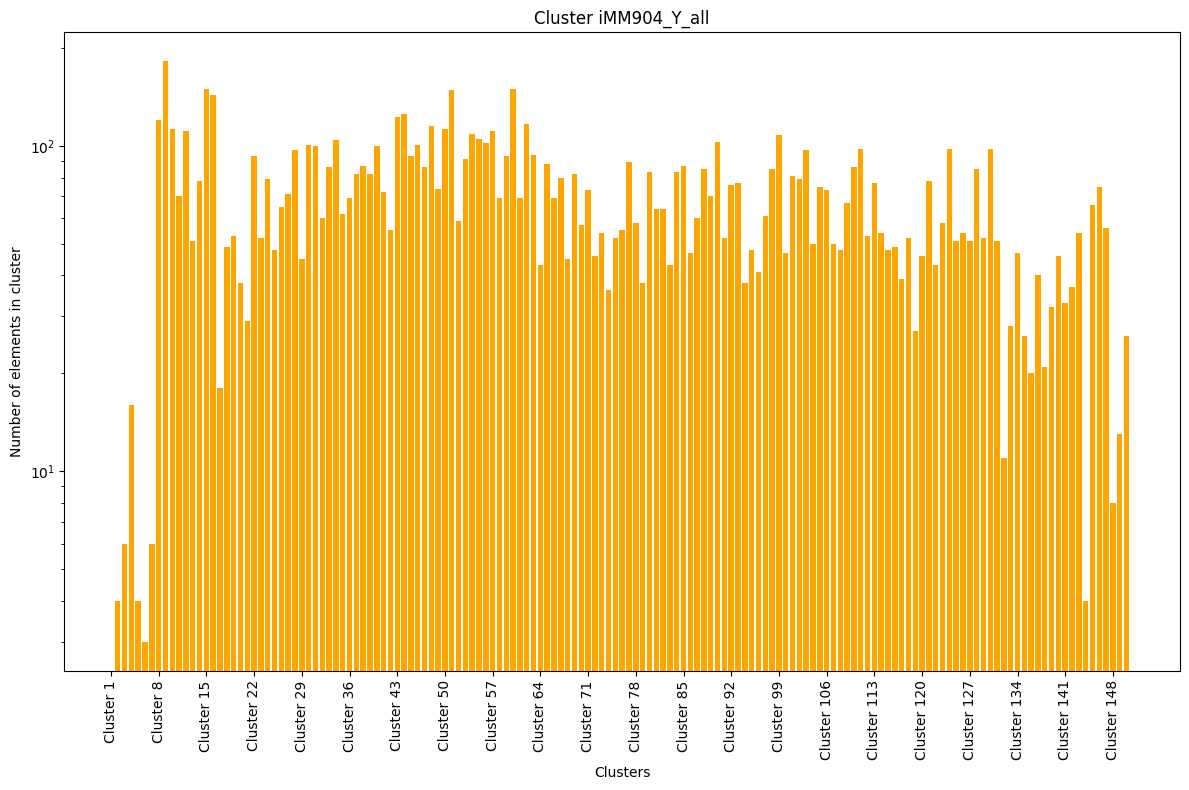

iPC815
File: iPC815_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 76
Shannon entropy: 5.9971


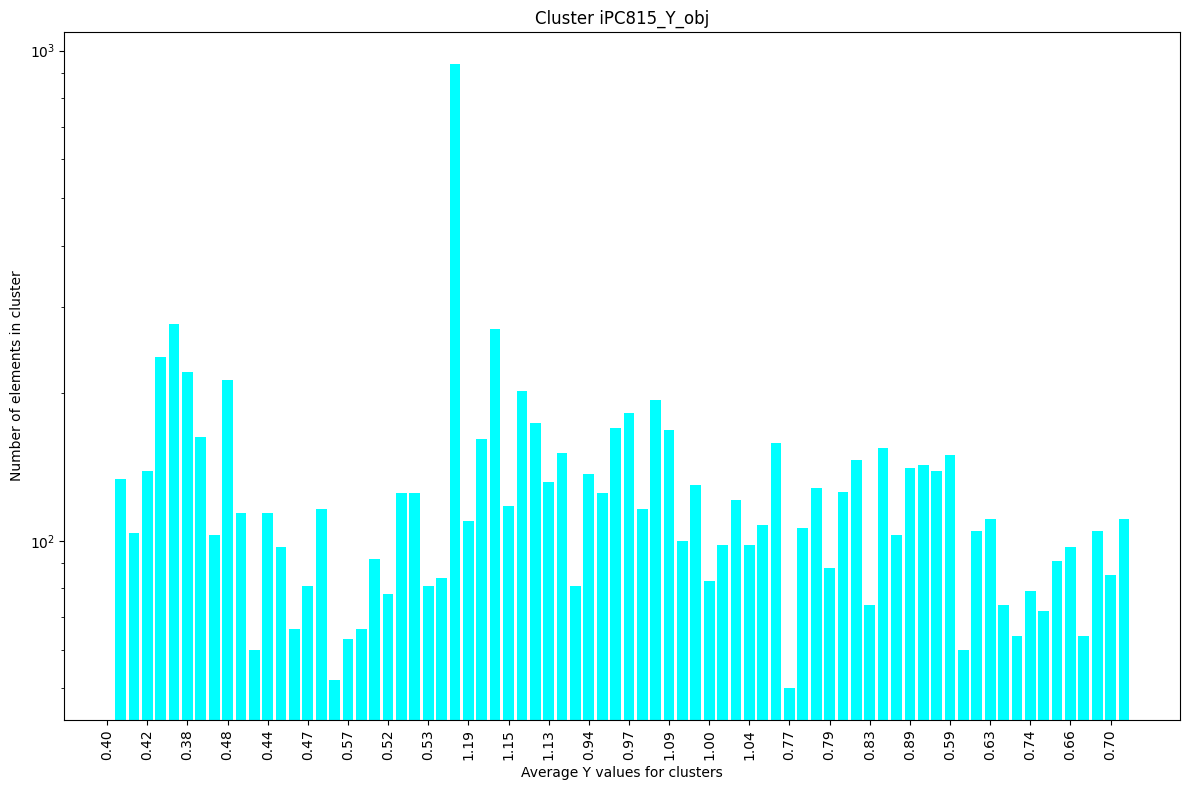

File: iPC815_Y_all size: (10000, 2767)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 106
Shannon entropy: 6.4939


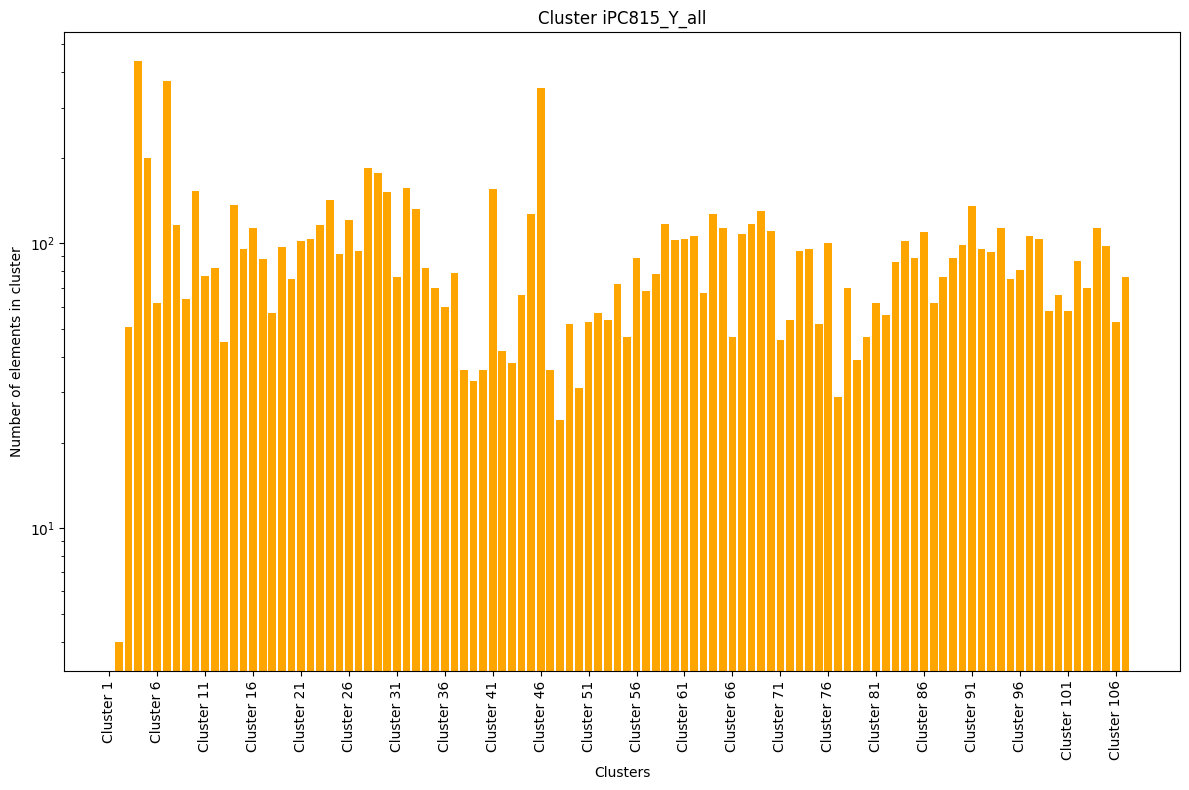

iYO844
File: iYO844_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 52
Shannon entropy: 5.2642


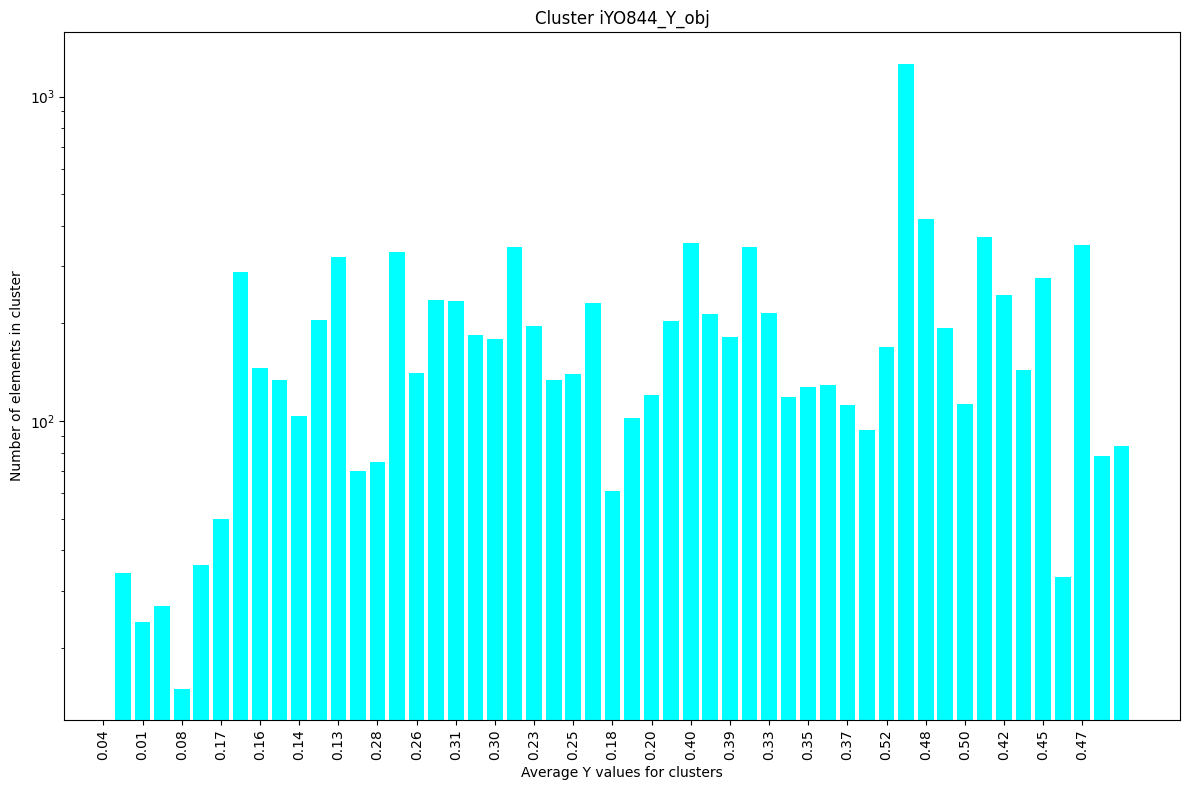

File: iYO844_Y_all size: (10000, 1806)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 114
Shannon entropy: 6.3216


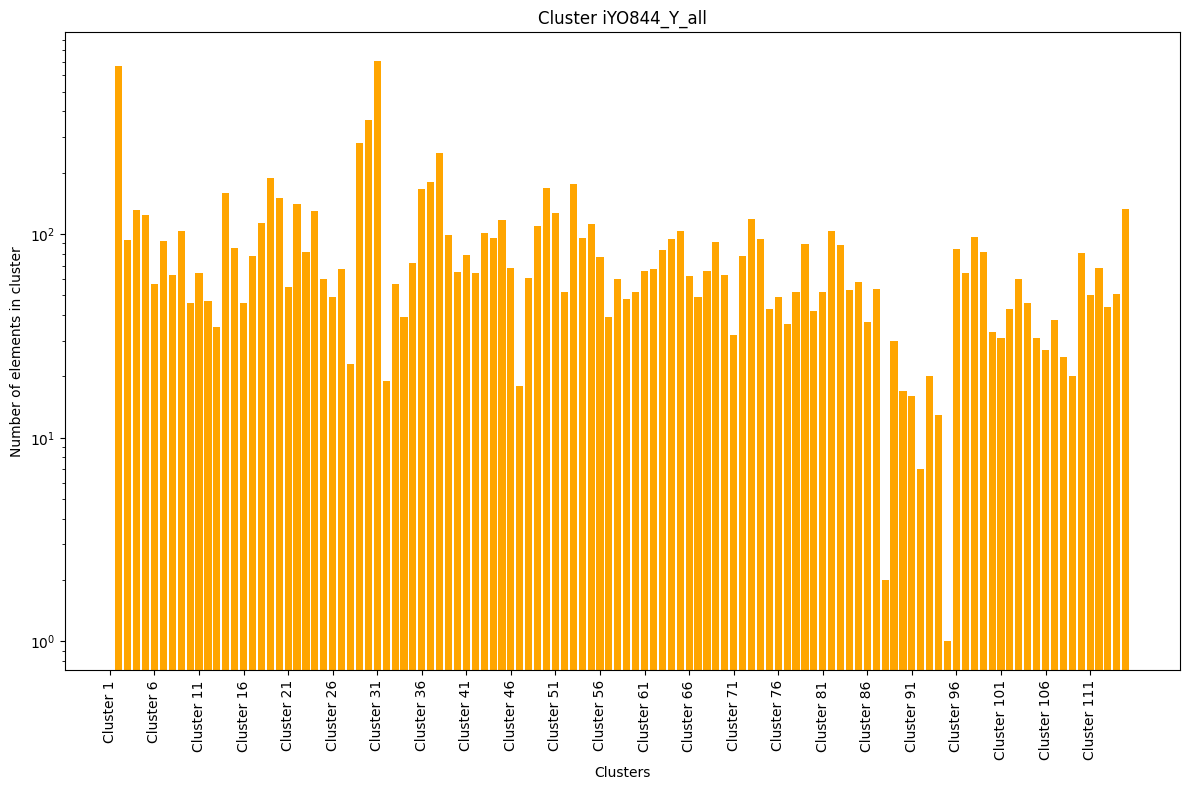

iYS1720
File: iYS1720_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 106
Shannon entropy: 6.4085


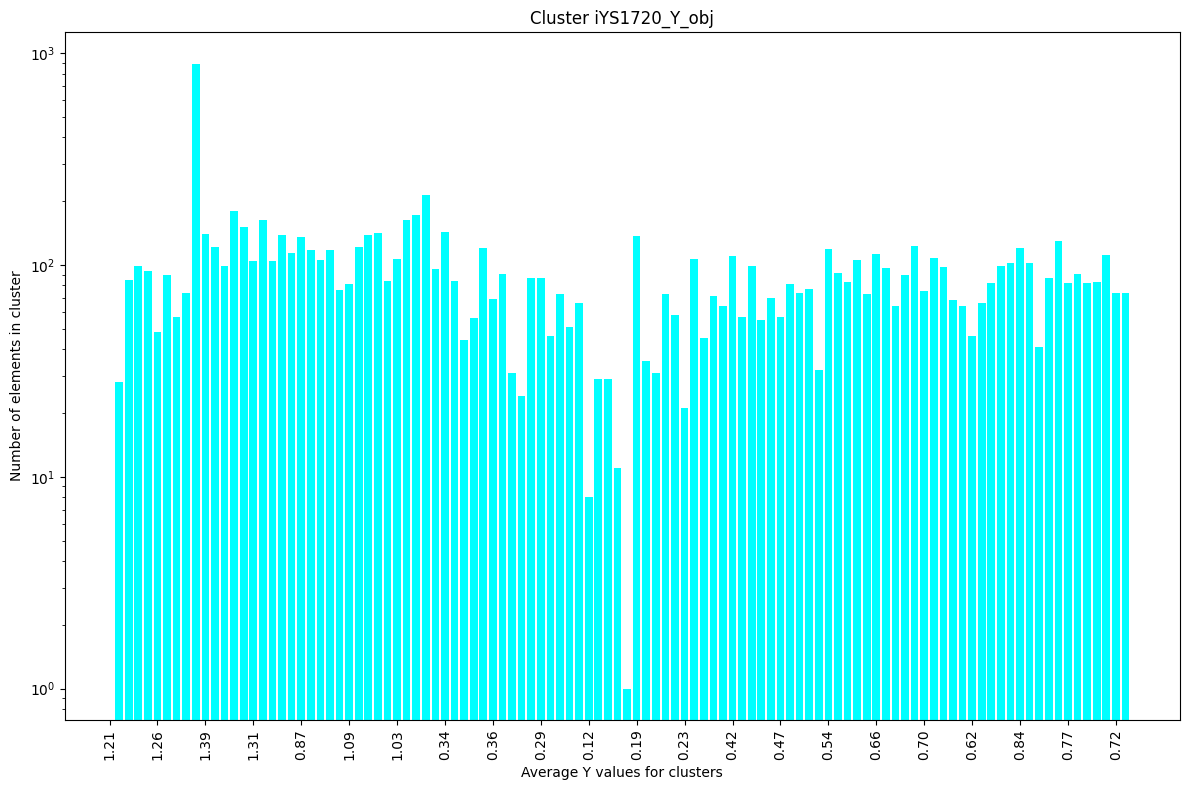

File: iYS1720_Y_all size: (10000, 4451)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 261
Shannon entropy: 7.6949


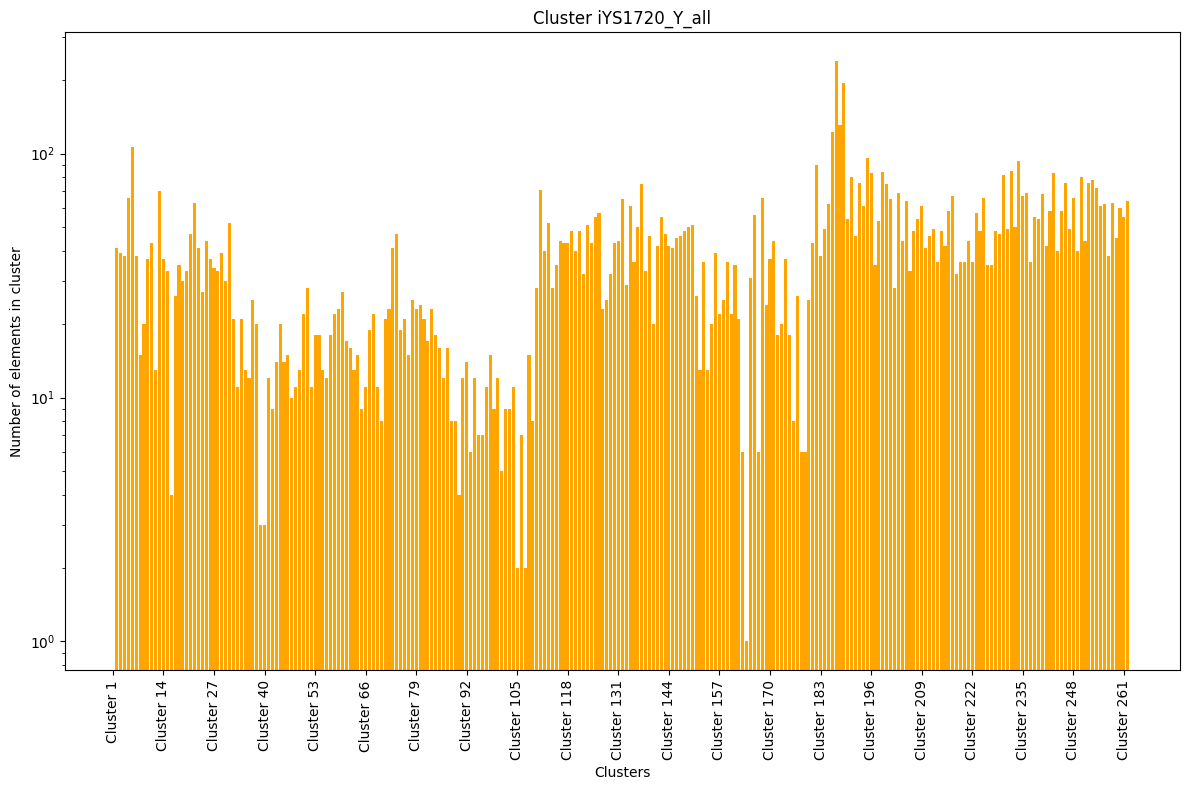

iYS854
File: iYS854_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 167
Shannon entropy: 7.1106


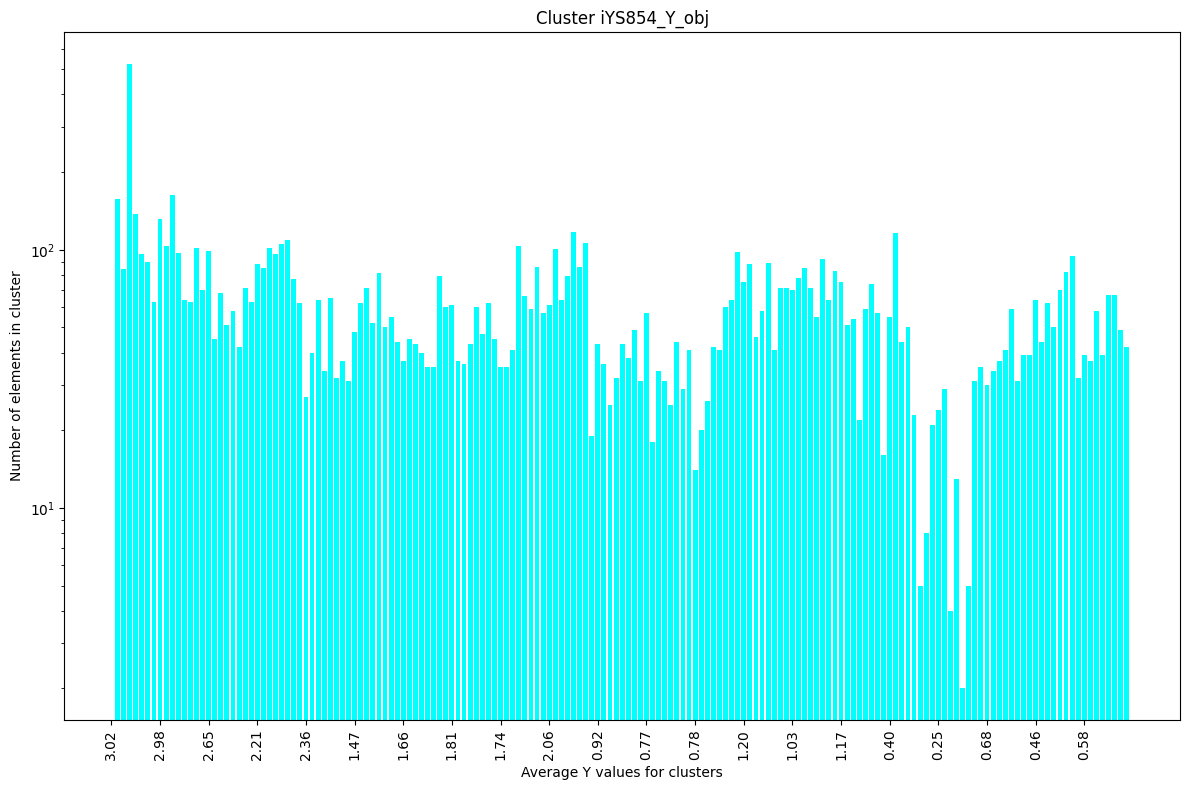

File: iYS854_Y_all size: (10000, 2086)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 215
Shannon entropy: 7.3337


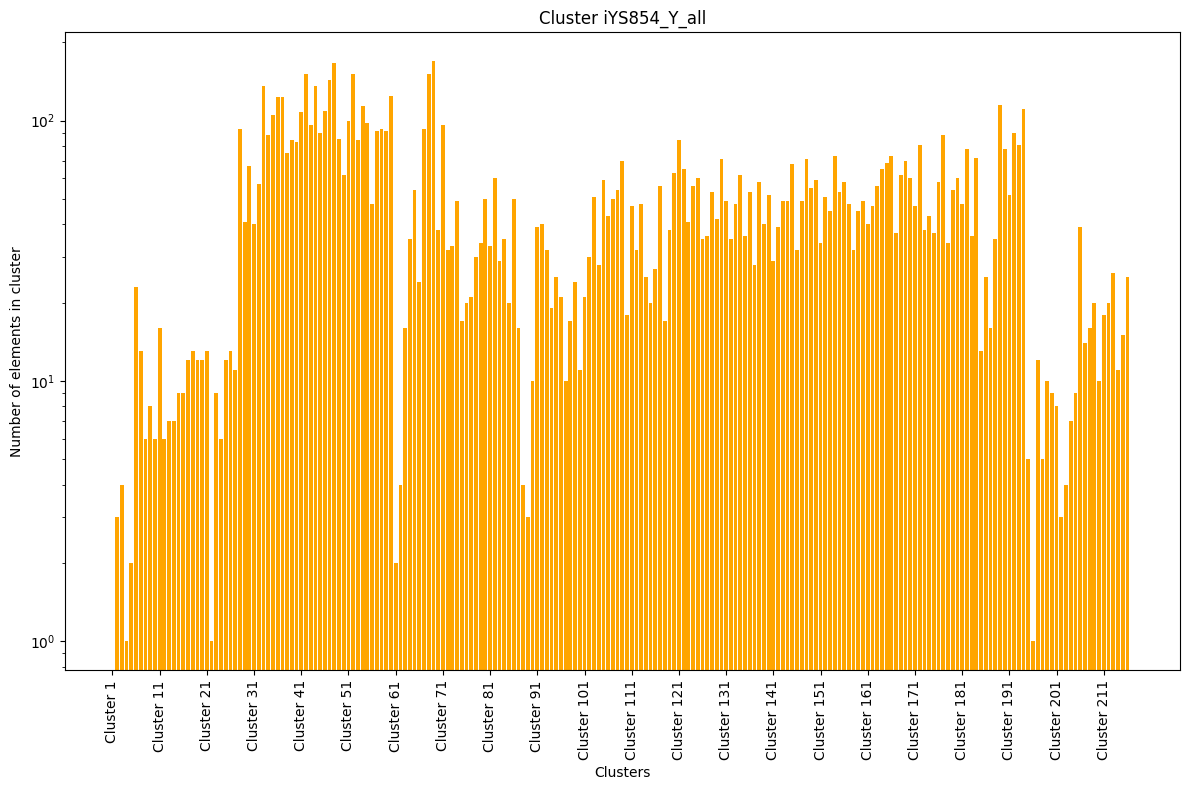

iCN718
File: iCN718_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 31
Shannon entropy: 4.0750


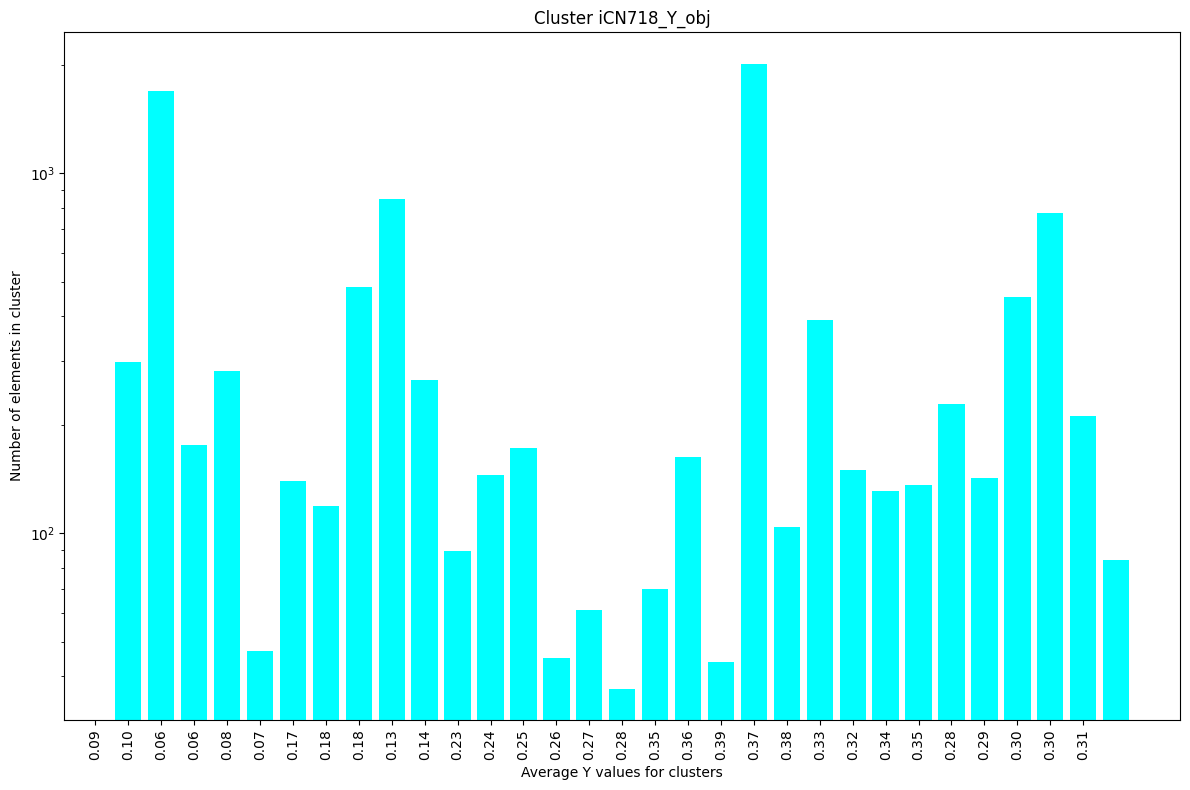

File: iCN718_Y_all size: (10000, 1438)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 223
Shannon entropy: 7.2699


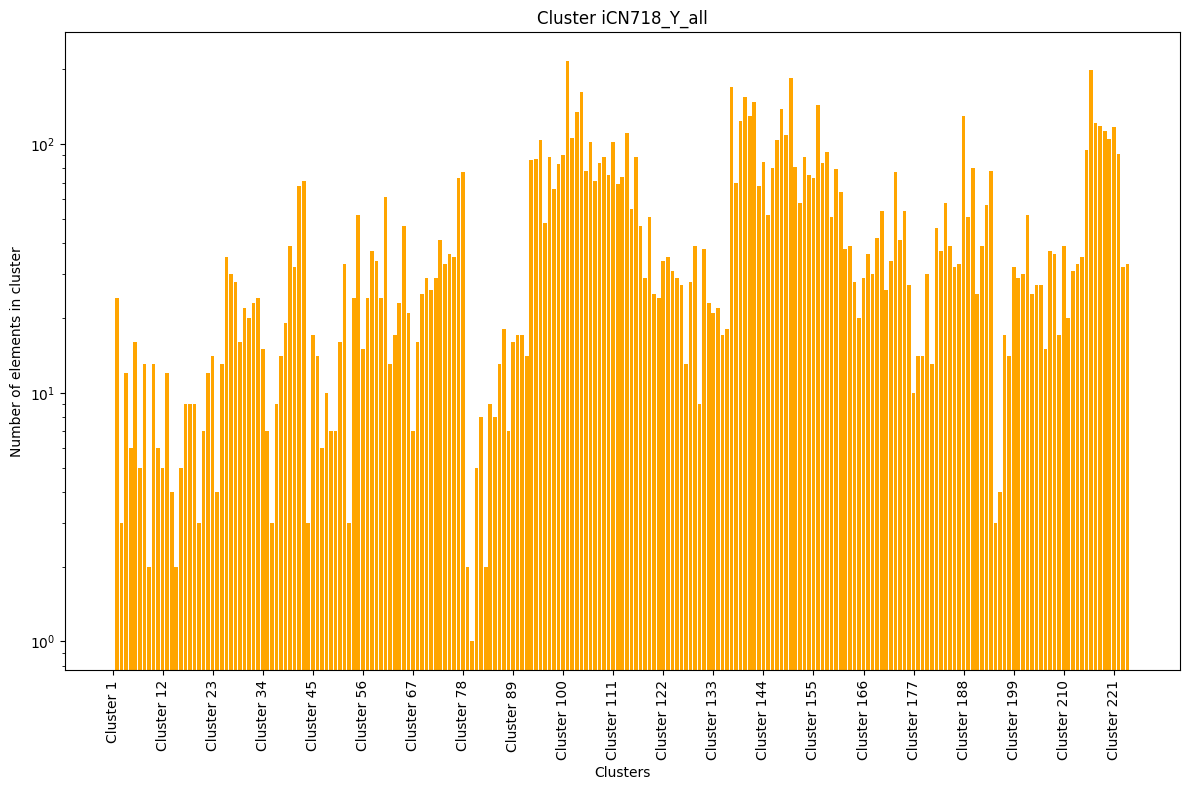

iNF517
File: iNF517_Y_obj size: (10000, 1)
Threshold (Precision): 0.01
Number of clusters: 21
Shannon entropy: 4.2726


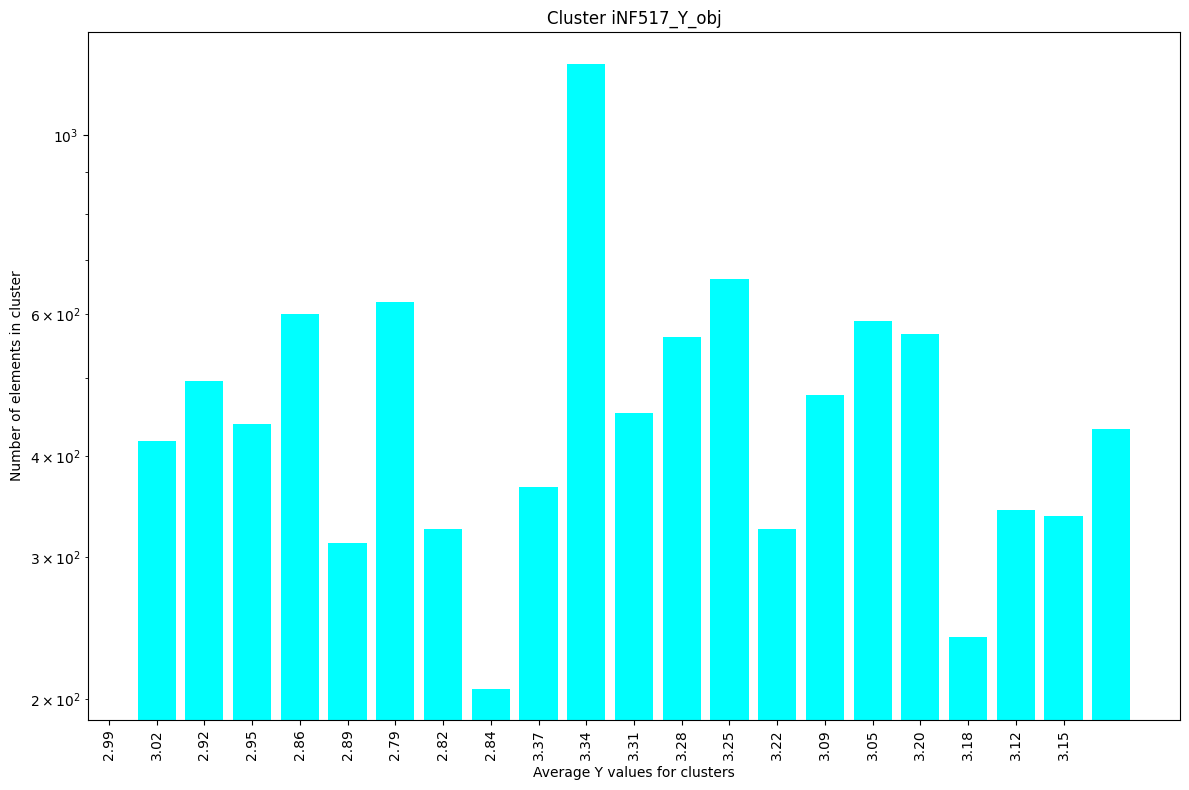

File: iNF517_Y_all size: (10000, 1079)
Threshold (Precision): 0.01 Adjusted Threshold: 0.01
Number of clusters: 16
Shannon entropy: 3.2050


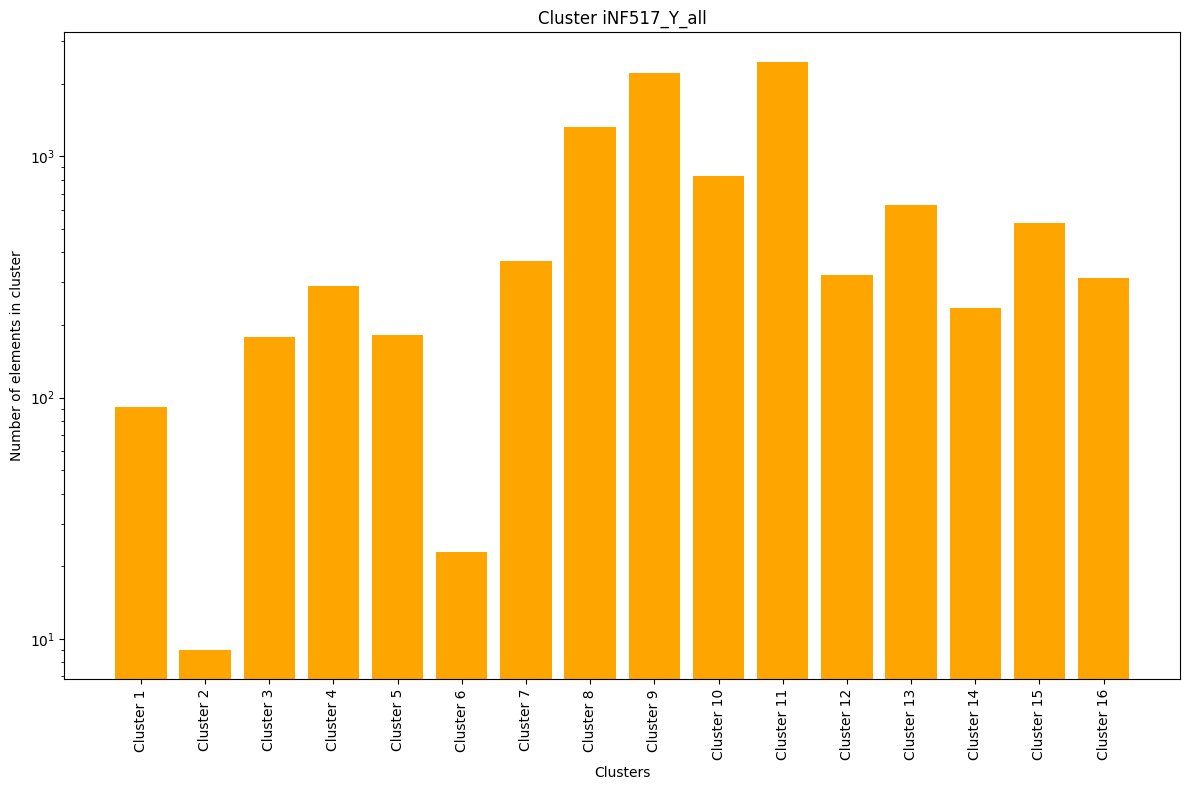


Summary:
File Name,Size(obj),Threshold(Y_obj),Clusters(Y_obj),Entropy(Y_obj),Size(all),Threshold(Y_all),Clusters(Y_all),Entropy(Y_all)
e_coli_core,1,0.01,6,2.2667,51.9413,0.01,22,2.5289
iEK1008,1,0.01,31,4.6555,473.5062,0.01,97,6.2414
iIT341,1,0.01,46,3.1886,308.2361,0.01,84,4.5615
iJN1463,1,0.01,51,4.8964,607.6669,0.01,77,5.7807
iML1515,1,0.01,66,5.8037,448.9,0.01,121,6.7005
iMM904,1,0.01,58,5.5657,288.9085,0.01,149,7.0320
iPC815,1,0.01,76,5.9971,377.0682,0.01,106,6.4939
iYO844,1,0.01,52,5.2642,331.4583,0.01,114,6.3216
iYS1720,1,0.01,106,6.4085,430.9575,0.01,261,7.6949
iYS854,1,0.01,167,7.1106,541.0579,0.01,215,7.3337
iCN718,1,0.01,31,4.0750,304.7148,0.01,223,7.2699
iNF517,1,0.01,21,4.2726,374.5864,0.01,16,3.2050


In [4]:
from Library.Import import *
from Library.Utilities import get_clusters, plot_clusters, compute_shannon_entropy

def getY(filename):
    # Return all Y and Y for objective
    from Library.Build_Dataset import TrainingSet, get_objective
    # Read and return Y 
    parameter = TrainingSet()
    parameter.load(filename)
    Y_all = np.copy(parameter.Y)
    parameter.filter_measure(measure=[get_objective(parameter.model)])
    Y_obj = parameter.Y
    return Y_all, Y_obj 

DIRECTORY = './Dataset_input/'

seed = 1
np.random.seed(seed=seed)  
species = [ 
    'e_coli_core', #0
    'iEK1008', 
    'iIT341', #2
    'iJN1463', 
    'iML1515', #4
    'iMM904',
    'iPC815', #6
    'iYO844',
    'iYS1720', 
    'iYS854', # 9
    'iCN718',
    'iNF517',
    'iML1515EXP' # 12
]
precision = 0.01
results = []
plotting = True

for i in list(range(12)): 
    name = species[i]
    print(name)
    # Get data
    filename = f'{name}_train'
    trainingfile = f'{DIRECTORY}{filename}'
    Y_all, Y_obj = getY(trainingfile)
    
    # Clustering for Y_obj
    size_obj, clusters_obj, adjusted_threshold_obj, num_clusters_obj, entropy_obj = get_clusters(Y_obj, precision)
    if plotting:
        plot_clusters(Y_obj, clusters_obj, f'{name}_Y_obj', precision, adjusted_threshold_obj, color='cyan')
    
    # Clustering for Y_all
    size_all, clusters_all, adjusted_threshold_all, num_clusters_all, entropy_all = get_clusters(Y_all, precision)
    if plotting:
        plot_clusters(Y_all, clusters_all, f'{name}_Y_all', precision, adjusted_threshold_all, color='orange')
    
    results.append((name, size_obj, adjusted_threshold_obj, num_clusters_obj, entropy_obj, size_all, adjusted_threshold_all, num_clusters_all, entropy_all))

# Print summary after plotting all curves for all files
print("\nSummary:")
print("File Name,Size(obj),Threshold(Y_obj),Clusters(Y_obj),Entropy(Y_obj),Size(all),Threshold(Y_all),Clusters(Y_all),Entropy(Y_all)")
for result in results:
    name, size_obj, adjusted_threshold_obj, num_clusters_obj, entropy_obj, size_all, adjusted_threshold_all, num_clusters_all, entropy_all = result
    print(f"{name},{size_obj},{adjusted_threshold_obj:.2f},{num_clusters_obj},{entropy_obj:.4f},{size_all},{adjusted_threshold_all:.2f},{num_clusters_all},{entropy_all:.4f}")
